## Imports

In [78]:
#inporting packages
from sci378 import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [39]:
#loading in dataset
df = pd.read_csv("stackoverflow_full.csv")
df.head(2)

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1


## Data cleaning

In [40]:
#checking feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 6.2+ MB


In [41]:
#checking for null values 
df.isnull().sum()

Unnamed: 0         0
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

In [42]:
#getting column names
df.columns

Index(['Unnamed: 0', 'Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed'],
      dtype='object')

In [43]:
#dropping first column because it has no significant meaning
df = df.drop(['Unnamed: 0'], axis=1)
df.head(2)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1


In [44]:
#dropping HaveWorkedWith - coding abilities are accounted for in the ComputerSkills feature
df = df.drop(['HaveWorkedWith'], axis=1)
df.head(2)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,12,1


In [45]:
#adding continent feature to group country
country_to_continent = {
'United States of America': 'North America', 'Germany': 'Europe', 'India': 'Asia', 'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Canada': 'North America', 'France': 'Europe', 'Brazil': 'South America', 'Poland': 'Europe', 
    'Netherlands': 'Europe', 'Spain': 'Europe', 'Australia': 'Oceania', 'Italy': 'Europe', 'Sweden': 'Europe', 
    'Russian Federation': 'Europe', 'Switzerland': 'Europe', 'Turkey': 'Europe', 'Austria': 'Europe', 'Israel': 'Asia',
    'Czech Republic': 'Europe', 'Mexico': 'North America', 'Belgium': 'Europe', 'Denmark': 'Europe', 'Ukraine': 'Europe',
    'Norway': 'Europe', 'Argentina': 'South America', 'Iran, Islamic Republic of...': 'Asia', 'Finland': 'Europe', 
    'South Africa': 'Africa', 'Pakistan': 'Asia', 'Portugal': 'Europe', 'Romania': 'Europe', 'Greece': 'Europe',
    'New Zealand': 'Oceania', 'Hungary': 'Europe', 'Colombia': 'South America', 'Bangladesh': 'Asia', 'Japan': 'Asia',
    'Bulgaria': 'Europe', 'China': 'Asia', 'Indonesia': 'Asia', 'Ireland': 'Europe', 'Slovenia': 'Europe', 'Nigeria': 'Africa',
    'Serbia': 'Europe', 'Egypt': 'Africa', 'Philippines': 'Asia', 'Sri Lanka': 'Asia', 'Chile': 'South America', 
    'Croatia': 'Europe', 'Lithuania': 'Europe', 'Taiwan': 'Asia', 'Singapore': 'Asia', 'Malaysia': 'Asia', 'Slovakia': 'Europe',
    'Viet Nam': 'Asia', 'Kenya': 'Africa', 'Estonia': 'Europe', 'Uruguay': 'South America', 'Nepal': 'Asia', 'Belarus': 'Europe', 
    'Thailand': 'Asia', 'Hong Kong (S.A.R.)': 'Asia', 'Peru': 'South America', 'South Korea': 'Asia', 
    'United Arab Emirates': 'Asia', 'Georgia': 'Asia', 'Venezuela, Bolivarian Republic of...': 'South America',
    'Dominican Republic': 'North America', 'Morocco': 'Africa', 'Latvia': 'Europe', 'Ecuador': 'South America', 
    'Bosnia and Herzegovina': 'Europe', 'Costa Rica': 'North America', 'Armenia': 'Asia', 'Tunisia': 'Africa', 
    'Saudi Arabia': 'Asia', 'Guatemala': 'North America', 'Kazakhstan': 'Asia', 'Paraguay': 'South America',
    'Albania': 'Europe', 'Ghana': 'Africa', 'Luxembourg': 'Europe', 'The former Yugoslav Republic of Macedonia': 'Europe',
    'Lebanon': 'Asia', 'Jordan': 'Asia', 'Ethiopia': 'Africa', 'Cyprus': 'Europe', 'Azerbaijan': 'Asia',
    'Republic of Korea': 'Asia', 'Bolivia': 'South America', 'Uganda': 'Africa', 'Republic of Moldova': 'Europe',
    'Uzbekistan': 'Asia', 'Malta': 'Europe', 'Cuba': 'North America', 'Iceland': 'Europe', 'El Salvador': 'North America', 
    'Panama': 'North America', 'United Republic of Tanzania': 'Africa', 'Syrian Arab Republic': 'Asia', 'Myanmar': 'Asia',
    'Iraq': 'Asia', 'Honduras': 'North America', 'Kosovo': 'Europe', 'Nomadic': 'Unknown', 'Mauritius': 'Africa', 
    'Cameroon': 'Africa', 'Palestine': 'Asia', 'Montenegro': 'Europe', 'Sudan': 'Africa', 'Algeria': 'Africa', 
    'Zimbabwe': 'Africa', 'Nicaragua': 'North America', 'Rwanda': 'Africa', 'Kuwait': 'Asia', 'Cambodia': 'Asia', 
    'Madagascar': 'Africa', 'Kyrgyzstan': 'Asia', 'Afghanistan': 'Asia', "Côte d'Ivoire": 'Africa', 'Mongolia': 'Asia',
    'Jamaica': 'North America', 'Trinidad and Tobago': 'North America', 'Zambia': 'Africa', 'Senegal': 'Africa', 
    'Andorra': 'Europe', 'Maldives': 'Asia', 'Bahrain': 'Asia', 'Qatar': 'Asia', 'Namibia': 'Africa', 'Benin': 'Africa',
    'Turkmenistan': 'Asia', 'Yemen': 'Asia', 'Democratic Republic of the Congo': 'Africa', 'Angola': 'Africa',
    'Oman': 'Asia', 'Congo, Republic of the...': 'Africa', 'Botswana': 'Africa', 'Mozambique': 'Africa',
    'Tajikistan': 'Asia', 'Malawi': 'Africa', 'Barbados': 'North America', 'Isle of Man': 'Europe', 
    'Guyana': 'South America', 'Swaziland': 'Africa', 'Togo': 'Africa', 'Libyan Arab Jamahiriya': 'Africa', 
    "Lao People's Democratic Republic": 'Asia', 'Somalia': 'Africa', 'Lesotho': 'Africa', 'Suriname': 'South America', 
    'Mali': 'Africa', 'Bhutan': 'Asia', 'Belize': 'North America', 'Guinea': 'Africa', 'Cape Verde': 'Africa', 
    'Haiti': 'North America', 'Fiji': 'Oceania', 'Timor-Leste': 'Asia', 'Saint Lucia': 'North America', 'Niger': 'Africa', 
    'Djibouti': 'Africa', 'Liberia': 'Africa', 'Monaco': 'Europe', 'Saint Kitts and Nevis': 'North America',
    'Gambia': 'Africa', 'Seychelles': 'Africa', 'Burkina Faso': 'Africa', 'Saint Vincent and the Grenadines': 'North America',
    'Burundi': 'Africa', 'Dominica': 'North America', 'Mauritania': 'Africa'

}

df['Continent'] = df['Country'].map(country_to_continent)

df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed,Continent
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,4,0,Europe
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,12,1,Europe
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,7,0,Europe
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,13,0,North America
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,2,0,Asia


In [46]:
#dropping Country column - when applying one hot encoder we do not want to end up with 170+ features
df = df.drop(['Country'], axis=1)
df.head(2)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Continent
0,<35,No,Master,1,Man,No,Dev,7,4,51552.0,4,0,Europe
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,46482.0,12,1,Europe


In [47]:
#getting list of names of all the categorical variables
cat_var = df.select_dtypes(include=['object']).columns.tolist()
cat_var

['Age',
 'Accessibility',
 'EdLevel',
 'Gender',
 'MentalHealth',
 'MainBranch',
 'Continent']

In [48]:
#converting list to a categorical dataframe
cat_df = df[cat_var]
cat_df.head(2)

,Age,Accessibility,EdLevel,Gender,MentalHealth,MainBranch,Continent
0,<35,No,Master,Man,No,Dev,Europe
1,<35,No,Undergraduate,Man,No,Dev,Europe


In [49]:
#prepped to use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [50]:
# Perform one-hot encoding - this is stored as an array
encoder = OneHotEncoder(sparse=False)
categorical_encoded = encoder.fit_transform(cat_df)

# creating a dataframe with encoded features
categorical_encoded_df = pd.DataFrame(categorical_encoded, 
                                        columns=encoder.get_feature_names_out())

#outputting
categorical_encoded_df.head()

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,...,MentalHealth_Yes,MainBranch_Dev,MainBranch_NotDev,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
categorical_encoded_df.columns

Index(['Age_<35', 'Age_>35', 'Accessibility_No', 'Accessibility_Yes',
       'EdLevel_Master', 'EdLevel_NoHigherEd', 'EdLevel_Other', 'EdLevel_PhD',
       'EdLevel_Undergraduate', 'Gender_Man', 'Gender_NonBinary',
       'Gender_Woman', 'MentalHealth_No', 'MentalHealth_Yes', 'MainBranch_Dev',
       'MainBranch_NotDev', 'Continent_Africa', 'Continent_Asia',
       'Continent_Europe', 'Continent_North America', 'Continent_Oceania',
       'Continent_South America', 'Continent_Unknown'],
      dtype='object')

In [52]:
#dropping feature to prevent dependencies
categorical_encoded_df = categorical_encoded_df.drop(['Age_>35', 'Accessibility_No','EdLevel_Other','Gender_NonBinary',
                                                     'MentalHealth_No','MainBranch_NotDev','Continent_Unknown'], axis=1)
categorical_encoded_df.head(2)

,Age_<35,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_Woman,MentalHealth_Yes,MainBranch_Dev,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
# Drop the original categorical columns from X
df_encoded = df.drop(columns=cat_var)

# Concatenate the one-hot encoded categorical variables with the rest of the features
df_encoded = pd.concat([df_encoded,categorical_encoded_df], axis=1)

#viewing dataset
df_encoded.head()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Age_<35,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,...,Gender_Man,Gender_Woman,MentalHealth_Yes,MainBranch_Dev,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1,7,4,51552.0,4,0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,12,5,46482.0,12,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,15,6,77290.0,7,0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,9,6,46135.0,13,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,40,30,160932.0,2,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## ML Preprossesing

In [54]:
# Establish our target feature, churn, as our y feature
y = df_encoded['Employed']

# Drop our target feature from our features dataframe
X = df_encoded.drop('Employed', axis = 1)

In [55]:
# so far we have created: 

# df - contains actual values in dataframe
# df_encoded - is our encoded dataframe
# y - target variable 
# X - features encoded 

# before any splitting or training, 
# pausing to explore trends in the data 

In [71]:
X.shape

(73462, 21)

## Data Exploration

In [57]:
#creating function to exploring relationship between Employment and Variables
def paired_bar(df,var,title):
    copy = df.copy()
    copy = copy.groupby(var)['Employed'].value_counts().to_frame()
    copy = copy.rename({'Employed':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot(x=var, y = 'pct_total', hue = 'Employed', data = copy)
    a.set_title(title, fontsize = 12, fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), rotation=30)
    a.set_ylabel('% of Applicants', fontweight = 'bold')

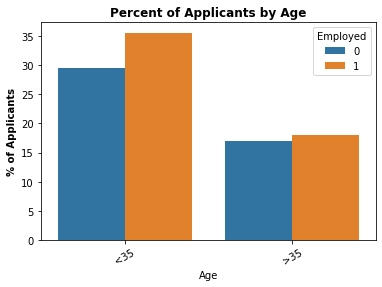

In [58]:
#age
paired_bar(df=df,var='Age', title='Percent of Applicants by Age')

In [ ]:
#education
paired_bar(df=df,var='EdLevel', title='Percent of Applicants by Education')

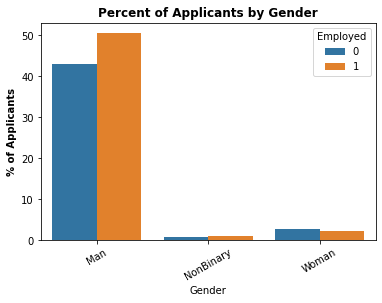

In [59]:
#gender
paired_bar(df=df,var='Gender', title='Percent of Applicants by Gender')

In [ ]:
#continent
paired_bar(df=df,var='Continent', title='Percent of Applicants by Continent')

In [ ]:
#amount of computer skills
a= sns.histplot(data=df, x="ComputerSkills", hue="Employed")
a.set_title('Distribution of Computer Skills by Job Acceptance', fontweight = 'bold')
a.set_xlabel('Number of Computer Skills/Languages')

## Machine Learning Algorithms

In [126]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 46)

In [127]:
# logistic regression with report
lr_classifier = LogisticRegression(fit_intercept=False, solver='liblinear')
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)

print(lr_report)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      8529
           1       0.78      0.80      0.79      9837

    accuracy                           0.77     18366
   macro avg       0.77      0.77      0.77     18366
weighted avg       0.77      0.77      0.77     18366



In [128]:
# decision tree with report
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_report = classification_report(y_test, dt_predictions)

print(dt_report)

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      8529
           1       0.73      0.72      0.73      9837

    accuracy                           0.71     18366
   macro avg       0.71      0.71      0.71     18366
weighted avg       0.71      0.71      0.71     18366



In [129]:
# K nearest neighbors with report
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

print(knn_report)

              precision    recall  f1-score   support

           0       0.66      0.64      0.65      8529
           1       0.70      0.72      0.71      9837

    accuracy                           0.68     18366
   macro avg       0.68      0.68      0.68     18366
weighted avg       0.68      0.68      0.68     18366



In [139]:
# Random Forest with report
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

print(rf_report)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      8529
           1       0.77      0.80      0.79      9837

    accuracy                           0.77     18366
   macro avg       0.77      0.77      0.77     18366
weighted avg       0.77      0.77      0.77     18366



In [136]:
precisionlr = precision_score(y_test, lr_predictions, average='macro')
precisiondt = precision_score(y_test, dt_predictions, average='macro')
precisionknn = precision_score(y_test, knn_predictions, average='macro')
precisionrf = precision_score(y_test, rf_predictions, average='macro')

print("LR precision",precisionlr)
print("DT precision",precisiondt)
print("KNN precision",precisionknn)
print("RF precision",precisionrf)

LR precision 0.7700366375621432
DT precision 0.7092363493901039
KNN precision 0.6792795075552103
RF precision 0.7676007469258637


In [141]:
recalllr = recall_score(y_test, lr_predictions, average='macro')
recalldt = recall_score(y_test, dt_predictions, average='macro')
recallknn = recall_score(y_test, knn_predictions, average='macro')
recallrf = recall_score(y_test, rf_predictions, average='macro')

print("LR recall",recallrf)
print("DT recall",recalldt)
print("KNN recall",recallknn)
print("RF recall",recallrf)

LR recall 0.7654562903286997
DT recall 0.7096845303741168
KnN recall 0.6781912032110027
RF recall 0.7654562903286997


In [140]:
# F1 scores comparison
f1lr=f1_score(y_test, lr_predictions,average='macro')
f1dt=f1_score(y_test, dt_predictions,average='macro')
f1knn=f1_score(y_test, knn_predictions,average='macro')
f1rf=f1_score(y_test, rf_predictions,average='macro')

print("LR F1",f1lr)
print("DT F1",f1dt)
print("KNN F1",f1knn)
print("RF F1",f1rf)

lR F1 0.7694062647286452
DT F1 0.7094088123283149
KnN F1 0.6785337447093196
Rg F1 0.7661158883822249
